# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [16]:
import numpy as np

### Simulation du lancé de dé

In [17]:
def Roll(): #fonction qui retourne un entier p
    return int(np.random.choice(range(1,7)))

In [18]:
for i in range(10) : 
    print(Roll())

4
3
3
6
5
1
5
6
1
3


### Compléter le code et commenter

In [19]:
A=0 #la position
NA=0 # la valeur indiquée par le dé
S=10 #position de la cible
c=0 #le compteur
while (A<S) :
    NA =Roll()
    if NA==6 and A==0 :
        c+=1
        A=1
        print('Vous etes a la position :',A,'La valeur du dé :',NA,'Compteur :',c)
    elif A>0 and NA+A<S :
        A+=NA
        c+=1
        print('Vous etes a la position :',A,'La valeur du dé :',NA,'Compteur :',c)
    elif NA+A==S :
        c+=1
        A=S
        print('Vous etes a la position :',A,'La valeur du dé :',NA,'Compteur :',c)
        break
    else :
        c+=1
        print('Vous etes a la position :',A,'La valeur du dé :',NA,'Compteur :',c)

Vous etes a la position : 0 La valeur du dé : 3 Compteur : 1
Vous etes a la position : 0 La valeur du dé : 4 Compteur : 2
Vous etes a la position : 0 La valeur du dé : 3 Compteur : 3
Vous etes a la position : 0 La valeur du dé : 2 Compteur : 4
Vous etes a la position : 0 La valeur du dé : 4 Compteur : 5
Vous etes a la position : 0 La valeur du dé : 1 Compteur : 6
Vous etes a la position : 0 La valeur du dé : 2 Compteur : 7
Vous etes a la position : 0 La valeur du dé : 5 Compteur : 8
Vous etes a la position : 0 La valeur du dé : 4 Compteur : 9
Vous etes a la position : 1 La valeur du dé : 6 Compteur : 10
Vous etes a la position : 5 La valeur du dé : 4 Compteur : 11
Vous etes a la position : 7 La valeur du dé : 2 Compteur : 12
Vous etes a la position : 8 La valeur du dé : 1 Compteur : 13
Vous etes a la position : 8 La valeur du dé : 4 Compteur : 14
Vous etes a la position : 8 La valeur du dé : 3 Compteur : 15
Vous etes a la position : 8 La valeur du dé : 6 Compteur : 16
Vous etes a la po

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [20]:
def sim(S):
    A=0 #la position
    NA=0 # la valeur indiquée par le dé
    c=0 #le compteur
    while (A<S) :
        NA =Roll()
        if NA==6 and A==0 :
            c+=1
            A=1
        elif A>0 and NA+A<S :
            A+=NA
            c+=1
        elif NA+A==S :
            c+=1
            A=S
            break
        else :
            c+=1
    return c
    

In [21]:
sim(20)

15

### Simulation de $10^5$  scénario 

In [22]:
for i in range(10):
    print(sim(20))

30
18
15
15
25
9
8
8
21
19


In [23]:
E=10000
N=15
L=[]
for i in range(E):
    L.append(sim(N))
def moyenne(L):
    tot=0
    for u in L:
        tot=tot+u
    return tot/len(L)
moyenne(L)

14.7276

<h1>Conclusion :</h1> on joue le lido E nombre de fois pour atteindre une cible N =15 en moyenne on a besoin de 14 coup pour finir le jeu.

In [24]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [25]:
ESP=Freq.sum()/10**5

In [26]:
x=list(range(10,20))

In [27]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [28]:
import matplotlib.pyplot as plt
xx=np.linspace(10,20,50)
yy=0.33709890909090906*xx+12.150573818181819

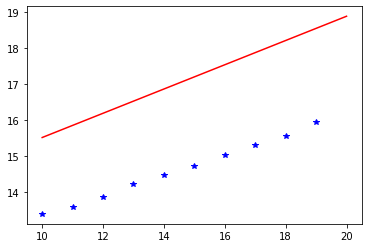

In [29]:
plt.plot(x,y,'b*')
plt.plot(xx,yy,'r')

In [30]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [31]:
slope

0.28292630303030314

In [32]:
intercept
#b

10.516740606060605

<u><h1 style="color:red;">Conclusion :</h1></u>
$$\mathbb{E}(X_n)=0.329\times n + 12.280$$
<br>la fonction d'une droite lineaire affine